In [1]:
from coffea import util, hist
import matplotlib.pyplot as plt
import mplhep
plt.style.use(mplhep.style.CMS)

In [2]:
infile_MC = util.load("DataHistograms_2017QCD.coffea")
infile_Sig1 = util.load("DataHistograms_2017Res1ToRes2GluTo3Glu.coffea")
infile_MC.add(infile_Sig1)
display(infile_MC)

variable_list = []
for variable, accumulator in infile_QCD.items():
    variable_list.append(variable)
variable_list.pop(0)

lumi = 41.53*1000
weight_xsec = {
    'QCD_Pt_300to470': lumi*6830/infile_MC["total_events"]["QCD_Pt_300to470"],
    'QCD_Pt_470to600': lumi*552.1/infile_MC["total_events"]["QCD_Pt_470to600"],
    'QCD_Pt_600to800': lumi*156.5/infile_MC["total_events"]["QCD_Pt_600to800"],
    'QCD_Pt_800to1000': lumi*26.28/infile_MC["total_events"]["QCD_Pt_800to1000"],
    'QCD_Pt_1000to1400': lumi*7.47/infile_MC["total_events"]["QCD_Pt_1000to1400"],
    'QCD_Pt_1400to1800': lumi*0.6484/infile_MC["total_events"]["QCD_Pt_1400to1800"],
    'QCD_Pt_1800to2400': lumi*0.08743/infile_MC["total_events"]["QCD_Pt_1800to2400"],
    'QCD_Pt_2400to3200': lumi*0.005236/infile_MC["total_events"]["QCD_Pt_2400to3200"],
    'QCD_Pt_3200toInf': lumi*0.0001357/infile_MC["total_events"]["QCD_Pt_3200toInf"],
}
weight_sigMC1 = {}
for name, N_evt in infile_MC["total_events"].items():
    if "QCD" in name:
        continue
    weight_sigMC1[name] = lumi/N_evt
weight_xsec.update(weight_sigMC1)
display(weight_xsec)

QCD_entries = []
for name, N_evt in infile_MC["total_events"].items():
    if "QCD" in name:
        QCD_entries.append(name)
print(QCD_entries)

mapping = {}
mapping["QCD"] = QCD_entries

Sig_entries = ["Res1ToRes2GluTo3Glu_M1-2000_R-0p1","Res1ToRes2GluTo3Glu_M1-4000_R-0p1"]
for sig in Sig_entries:
    mapping[sig] = sig
    
display(mapping)

axis2integrate = "selection"
selection2plot = ["pre-selection"]
fig, ax = plt.subplots(len(variable_list), 1, figsize=(10,len(variable_list)*8))
ax_counter = 0
for variable in variable_list:
    histo = infile_MC[variable]
    histo.scale(weight_xsec, axis='dataset')
    ih = histo.integrate(axis2integrate,selection2plot)
    ih = ih.group("dataset", hist.Cat("sel_dataset", "dataset"), mapping)
    plot = hist.plot1d(ih, ax=ax[ax_counter])
    plot.set_ylim(0.1,10000000)
    plot.set_yscale('log')
    if variable in ["m01", "m12", "m20", "pt1", "pt2"]:
        plot.set_xlim(0,6000)
    ax_counter+=1

{'total_events': defaultdict_accumulator(int,
                         {'QCD_Pt_2400to3200': 1910525,
                          'QCD_Pt_3200toInf': 757837,
                          'QCD_Pt_1800to2400': 2923940,
                          'QCD_Pt_1400to1800': 5667999,
                          'QCD_Pt_1000to1400': 35819797,
                          'QCD_Pt_800to1000': 77321674,
                          'QCD_Pt_600to800': 128469565,
                          'QCD_Pt_470to600': 27791204,
                          'QCD_Pt_300to470': 109308273,
                          'Res1ToRes2GluTo3Glu_M1-8000_R-0p7': 50000,
                          'Res1ToRes2GluTo3Glu_M1-8000_R-0p9': 49992,
                          'Res1ToRes2GluTo3Glu_M1-8000_R-0p5': 50000,
                          'Res1ToRes2GluTo3Glu_M1-8000_R-0p3': 50000,
                          'Res1ToRes2GluTo3Glu_M1-8000_R-0p2': 49997,
                          'Res1ToRes2GluTo3Glu_M1-8000_R-0p1': 47979,
                          'Res1T

In [3]:
infile_MC = util.load("DataHistograms_2017QCD.coffea")
infile_Sig1 = util.load("DataHistograms_2017Res1ToRes2GluTo3Glu.coffea")
infile_MC.add(infile_Sig1)
display(infile_MC)

lumi = 41.53*1000
weight_xsec = {
    'QCD_Pt_300to470': lumi*6830/infile_MC["total_events"]["QCD_Pt_300to470"],
    'QCD_Pt_470to600': lumi*552.1/infile_MC["total_events"]["QCD_Pt_470to600"],
    'QCD_Pt_600to800': lumi*156.5/infile_MC["total_events"]["QCD_Pt_600to800"],
    'QCD_Pt_800to1000': lumi*26.28/infile_MC["total_events"]["QCD_Pt_800to1000"],
    'QCD_Pt_1000to1400': lumi*7.47/infile_MC["total_events"]["QCD_Pt_1000to1400"],
    'QCD_Pt_1400to1800': lumi*0.6484/infile_MC["total_events"]["QCD_Pt_1400to1800"],
    'QCD_Pt_1800to2400': lumi*0.08743/infile_MC["total_events"]["QCD_Pt_1800to2400"],
    'QCD_Pt_2400to3200': lumi*0.005236/infile_MC["total_events"]["QCD_Pt_2400to3200"],
    'QCD_Pt_3200toInf': lumi*0.0001357/infile_MC["total_events"]["QCD_Pt_3200toInf"],
}
weight_sigMC1 = {}
for name, N_evt in infile_MC["total_events"].items():
    if "QCD" in name:
        continue
    weight_sigMC1[name] = lumi/N_evt
weight_xsec.update(weight_sigMC1)
display(weight_xsec)

QCD_entries = []
for name, N_evt in infile_MC["total_events"].items():
    if "QCD" in name:
        QCD_entries.append(name)
print(QCD_entries)

mapping = {}
mapping["QCD"] = QCD_entries

Sig_entries = ["Res1ToRes2GluTo3Glu_M1-2000_R-0p1"]
for sig in Sig_entries:
    mapping[sig] = sig
    
display(mapping)

axis2integrate = "selection"
selection2plot = ["pre-selection"]

{'total_events': defaultdict_accumulator(int,
                         {'QCD_Pt_2400to3200': 1910525,
                          'QCD_Pt_3200toInf': 757837,
                          'QCD_Pt_1800to2400': 2923940,
                          'QCD_Pt_1400to1800': 5667999,
                          'QCD_Pt_1000to1400': 35819797,
                          'QCD_Pt_800to1000': 77321674,
                          'QCD_Pt_600to800': 128469565,
                          'QCD_Pt_470to600': 27791204,
                          'QCD_Pt_300to470': 109308273,
                          'Res1ToRes2GluTo3Glu_M1-8000_R-0p7': 50000,
                          'Res1ToRes2GluTo3Glu_M1-8000_R-0p9': 49992,
                          'Res1ToRes2GluTo3Glu_M1-8000_R-0p5': 50000,
                          'Res1ToRes2GluTo3Glu_M1-8000_R-0p3': 50000,
                          'Res1ToRes2GluTo3Glu_M1-8000_R-0p2': 49997,
                          'Res1ToRes2GluTo3Glu_M1-8000_R-0p1': 47979,
                          'Res1T

{'QCD_Pt_300to470': 2.5949536317347177,
 'QCD_Pt_470to600': 0.8250348923349993,
 'QCD_Pt_600to800': 0.05059132098719257,
 'QCD_Pt_800to1000': 0.01411516776007721,
 'QCD_Pt_1000to1400': 0.008660827977333316,
 'QCD_Pt_1400to1800': 0.004750892157884996,
 'QCD_Pt_1800to2400': 0.0012418065692182466,
 'QCD_Pt_2400to3200': 0.00011381744808364194,
 'QCD_Pt_3200toInf': 7.436455332743056e-06,
 'Res1ToRes2GluTo3Glu_M1-8000_R-0p7': 0.8306,
 'Res1ToRes2GluTo3Glu_M1-8000_R-0p9': 0.8307329172667627,
 'Res1ToRes2GluTo3Glu_M1-8000_R-0p5': 0.8306,
 'Res1ToRes2GluTo3Glu_M1-8000_R-0p3': 0.8306,
 'Res1ToRes2GluTo3Glu_M1-8000_R-0p2': 0.8306498389903394,
 'Res1ToRes2GluTo3Glu_M1-8000_R-0p1': 0.8655870276579337,
 'Res1ToRes2GluTo3Glu_M1-7000_R-0p9': 0.865244385182716,
 'Res1ToRes2GluTo3Glu_M1-7000_R-0p7': 0.8836734259633594,
 'Res1ToRes2GluTo3Glu_M1-7000_R-0p5': 0.8306166123322466,
 'Res1ToRes2GluTo3Glu_M1-7000_R-0p3': 0.8306332253290132,
 'Res1ToRes2GluTo3Glu_M1-7000_R-0p2': 0.8306332253290132,
 'Res1ToRes2G

['QCD_Pt_2400to3200', 'QCD_Pt_3200toInf', 'QCD_Pt_1800to2400', 'QCD_Pt_1400to1800', 'QCD_Pt_1000to1400', 'QCD_Pt_800to1000', 'QCD_Pt_600to800', 'QCD_Pt_470to600', 'QCD_Pt_300to470']


{'QCD': ['QCD_Pt_2400to3200',
  'QCD_Pt_3200toInf',
  'QCD_Pt_1800to2400',
  'QCD_Pt_1400to1800',
  'QCD_Pt_1000to1400',
  'QCD_Pt_800to1000',
  'QCD_Pt_600to800',
  'QCD_Pt_470to600',
  'QCD_Pt_300to470'],
 'Res1ToRes2GluTo3Glu_M1-2000_R-0p1': 'Res1ToRes2GluTo3Glu_M1-2000_R-0p1'}

ValueError: Cannot add this histogram with histogram <Hist (dataset,selection,m12) instance at 0x7f48fd0f8810> of dissimilar dimensions

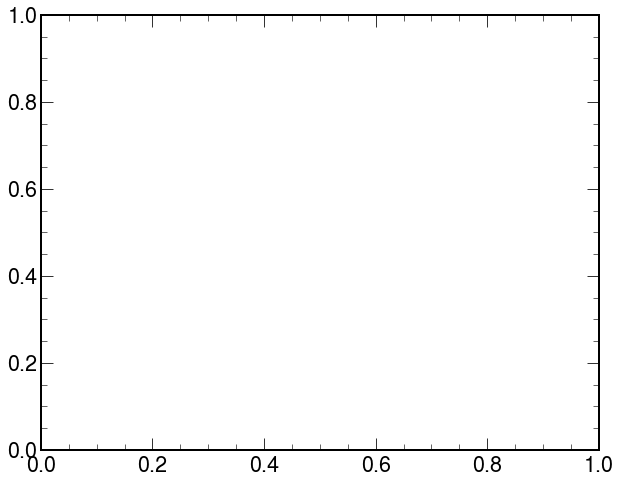

In [6]:
# fig, ax = plt.subplots(len(variable_list), 1, figsize=(10,len(variable_list)*8))
fig, ax = plt.subplots(1, 1, figsize=(10,8))
histo = infile_MC["m01"]
histo.add(infile_MC["m12"])

In [ ]:
histo.scale(weight_xsec, axis='dataset')
ih = histo.integrate(axis2integrate,selection2plot)
ih = ih.group("dataset", hist.Cat("sel_dataset", "dataset"), mapping)
plot = hist.plot1d(ih, ax=ax[ax_counter])
plot.set_ylim(0.1,10000000)
plot.set_yscale('log')
if variable in ["m01", "m12", "m20", "pt1", "pt2"]:
    plot.set_xlim(0,6000)
ax_counter+=1